In [22]:
# ! pip install yfinance

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    auc,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report,
)

In [24]:
import yfinance as yf

xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers="XMR-USD", period="max", interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [25]:
xmr.info

{'twitter': '"https://twitter.com/monero"',
 'name': 'Monero',
 'startDate': 1400630400,
 'description': 'Monero (XMR) is a cryptocurrency . Users are able to generate XMR through the process of mining. Monero has a current supply of 18,345,405.10132162. The last known price of Monero is 151.3029177 USD and is down -1.16 over the last 24 hours. It is currently trading on 250 active market(s) with $40,072,304.05 traded over the last 24 hours. More information can be found at https://www.getmonero.org/.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 152.54424,
 'open': 152.54424,
 'dayLow': 151.16718,
 'dayHigh': 153.52295,
 'regularMarketPreviousClose': 152.54424,
 'regularMarketOpen': 152.54424,
 'regularMarketDayLow': 151.16718,
 'regularMarketDayHigh': 153.52295,
 'volume': 64639952,
 'regularMarketVolume': 64639952,
 'averageVolume': 66633474,
 'averageVolume10days': 52939252,
 'averageDailyVolume10Day': 52939252,
 'marketCap': 2787262976,
 'fiftyTwoWeekLow': 116.10279,
 'fi

In [26]:
xmr.history_metadata

{'currency': 'USD',
 'symbol': 'XMR-USD',
 'exchangeName': 'CCC',
 'instrumentType': 'CRYPTOCURRENCY',
 'firstTradeDate': 1510185600,
 'regularMarketTime': 1697491320,
 'gmtoffset': 0,
 'timezone': 'UTC',
 'exchangeTimezoneName': 'UTC',
 'regularMarketPrice': 151.93045,
 'chartPreviousClose': 153.7955,
 'previousClose': 152.54424,
 'scale': 5,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'UTC',
   'start': 1697414400,
   'end': 1697414400,
   'gmtoffset': 0},
  'regular': {'timezone': 'UTC',
   'start': 1697414400,
   'end': 1697500740,
   'gmtoffset': 0},
  'post': {'timezone': 'UTC',
   'start': 1697500740,
   'end': 1697500740,
   'gmtoffset': 0}},
 'tradingPeriods':                                           pre_start                   pre_end  \
 Date                                                                            
 2023-10-09 00:00:00+00:00 2023-10-09 00:00:00+00:00 2023-10-09 00:00:00+00:00   
 2023-10-10 00:00:00+00:00 2023-10-10 00:00:00+00:00 2023-

In [27]:
xmr.actions

,Dividends,Stock Splits
Datetime,,


In [28]:
df_xmr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000
...,...,...,...,...,...,...
2023-10-12,153.852783,154.344238,151.021347,152.341812,152.341812,65445853
2023-10-13,152.339523,154.368774,151.051971,153.590515,153.590515,51282283
2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438


In [29]:
df_xmr.shift(-1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,121.344002,121.665001,101.757004,105.585999,105.585999,84614000.0
2017-11-10,105.750000,127.106003,103.877998,119.615997,119.615997,107708000.0
2017-11-11,119.597000,133.675003,110.617996,123.856003,123.856003,144948000.0
2017-11-12,128.960007,136.528000,120.921997,123.402000,123.402000,116200000.0
2017-11-13,123.615997,124.200996,118.625999,122.352997,122.352997,53544800.0
...,...,...,...,...,...,...
2023-10-12,152.339523,154.368774,151.051971,153.590515,153.590515,51282283.0
2023-10-13,153.583801,154.282990,151.850967,152.833160,152.833160,33344438.0
2023-10-14,152.833466,153.465881,152.173126,152.448990,152.448990,31895675.0


# Make Label


In [30]:
df_xmr["Close_difference"] = df_xmr["Close"].shift(-1) - df_xmr["Close"]
df = df_xmr.copy()

##### method1


In [31]:
df["Label"] = (df["Close_difference"] > 0).astype(int)
df.drop("Close_difference", axis=1, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Label
Date,,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...
2023-10-12,153.852783,154.344238,151.021347,152.341812,152.341812,65445853,1
2023-10-13,152.339523,154.368774,151.051971,153.590515,153.590515,51282283,0
2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,0


##### method2


In [32]:
# def make_target(row):
#     diff = row["Close_difference"]
#     n = 1
#     if diff >= n:
#         return 1
#     if diff <= -n:
#         return -1
#     return 0


# df["Label"] = df.apply(make_target, axis=1)
# df.drop("Close_difference", axis=1, inplace=True)
# df

In [33]:
df = df.reset_index(drop=False)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...,...
2163,2023-10-12,153.852783,154.344238,151.021347,152.341812,152.341812,65445853,1
2164,2023-10-13,152.339523,154.368774,151.051971,153.590515,153.590515,51282283,0
2165,2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,0
2166,2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,0


In [34]:
df["Variance"] = df["High"] - df["Low"]
df

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Variance
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0,11.185997
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1,19.907997
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1,23.228004
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0,23.057007
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0,15.606003
...,...,...,...,...,...,...,...,...,...
2163,2023-10-12,153.852783,154.344238,151.021347,152.341812,152.341812,65445853,1,3.322891
2164,2023-10-13,152.339523,154.368774,151.051971,153.590515,153.590515,51282283,0,3.316803
2165,2023-10-14,153.583801,154.282990,151.850967,152.833160,152.833160,33344438,0,2.432022
2166,2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,0,1.292755


In [35]:
df.drop(columns=["Open", "High", "Low", "Adj Close"], inplace=True)
df

,Date,Close,Volume,Label,Variance
0,2017-11-09,120.779999,86864600,0,11.185997
1,2017-11-10,105.585999,84614000,1,19.907997
2,2017-11-11,119.615997,107708000,1,23.228004
3,2017-11-12,123.856003,144948000,0,23.057007
4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2163,2023-10-12,152.341812,65445853,1,3.322891
2164,2023-10-13,153.590515,51282283,0,3.316803
2165,2023-10-14,152.833160,33344438,0,2.432022
2166,2023-10-15,152.448990,31895675,0,1.292755


# Divide Test Data


In [36]:
# def train_test_split_by_date(
#     df: pd.DataFrame,
#     start_date_train: str,
#     end_date_train: str,
#     start_date_test: str,
#     end_date_test: str,
#     divide_X_y: bool = True,
# ):
#     df_train = df[
#         (df["Date"] >= start_date_train) & (df["Date"] <= end_date_train)
#     ].reset_index(drop=True)

#     df_test = df[
#         (df["Date"] >= start_date_test) & (df["Date"] <= end_date_test)
#     ].reset_index(drop=True)

#     if divide_X_y:
#         X_train = df_train.drop(columns=["Label"])
#         y_train = df_train["Label"]

#         X_test = df_test.drop(columns=["Label"])
#         y_test = df_test["Label"]
#         return X_train, X_test, y_train, y_test

#     return df_train, df_test

In [37]:
def train_test_split_by_date(
    df: pd.DataFrame,
    start_date_train: str,
    end_date_train: str,
    start_date_test: str,
    end_date_test: str,
    divide_X_y: bool = True,
    test: bool = True,
):
    df_train = df[
        (df["Date"] >= start_date_train) & (df["Date"] <= end_date_train)
    ].reset_index(drop=True)

    df_test = df[
        (df["Date"] >= start_date_test) & (df["Date"] <= end_date_test)
    ].reset_index(drop=True)

    if divide_X_y:
        X_train = df_train.drop(columns=["Label"])
        y_train = df_train["Label"]
        if test:
            X_test = df_test.drop(columns=["Label"])
            y_test = df_test["Label"]
            return X_train, X_test, y_train, y_test
        return X_train, y_train

    return df_train, df_test

In [38]:
# start_date_train_val = "2017-11-09"
# end_date_train_val = "2023-09-07"

# start_date_test = "2023-09-08"
# end_date_test = "2023-10-07"  # "2023-10-07"

# # make train validation df
# df_train_val = df[
#     (df["Date"] >= start_date_train_val) & (df["Date"] <= end_date_train_val)
# ].reset_index(drop=True)
# print(df_train_val.head())
# print("-" * 50)
# print(df_train_val.tail())
# print("=" * 80)

# # make test df
# df_test = df[
#     (df["Date"] >= start_date_test) & (df["Date"] <= end_date_test)
# ].reset_index(drop=True)
# print(df_test.head())
# print("-" * 50)
# print(df_test.tail())
# print("=" * 80)

In [39]:
start_date_train_val = "2017-11-09"
end_date_train_val = "2023-09-07"

start_date_test = "2023-09-08"
end_date_test = "2023-10-07"

df_train_val, df_test = train_test_split_by_date(
    df,
    start_date_train_val,
    end_date_train_val,
    start_date_test,
    end_date_test,
    divide_X_y=False,
)

# Plots


### Stock Chart Plot


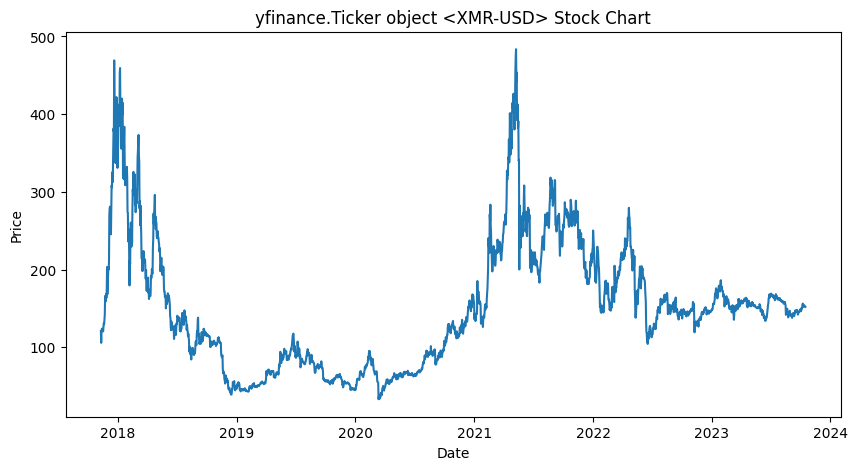

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(df_xmr["Close"])
plt.title(f"{xmr} Stock Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### candlestick


In [41]:
! pip install mplfinance

In [42]:
# import mplfinance as mpf

# mpf.plot(df_xmr, type="candle", style="yahoo", title=f"{xmr} Candlestick Chart")

# Feature Engineering


### Check Missing Values


In [43]:
df_train_val.isna().sum()

Date        0
Close       0
Volume      0
Label       0
Variance    0
dtype: int64

### Outlier


##### drop ountliers, Z-Score method


In [44]:
#def drop_outliers_zScore(data, threshold=3):
#    z_scores = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()
#    print((np.abs(z_scores) < threshold).all(axis=1).sum())
#    filtered_data = data[(np.abs(z_scores) < threshold).all(axis=1)]
#    return filtered_data

In [45]:
#drop_outliers_zScore(df_train_val)

##### drop outliers with LocalOutlierFactor


In [46]:
from sklearn.neighbors import LocalOutlierFactor


def drop_outliers_LOF(data: pd.DataFrame):
    clf = LocalOutlierFactor(n_neighbors=10, contamination=0.05)  # 0.03, 0.05

    # Fit the data to the model
    y_pred = clf.fit_predict(data.iloc[:, :-1])

    # Identify the outliers
    outliers = np.where(y_pred == -1)

    return data.drop(outliers[0])

In [47]:
df_train_val.reset_index(drop=False)

,index,Date,Close,Volume,Label,Variance
0,0,2017-11-09,120.779999,86864600,0,11.185997
1,1,2017-11-10,105.585999,84614000,1,19.907997
2,2,2017-11-11,119.615997,107708000,1,23.228004
3,3,2017-11-12,123.856003,144948000,0,23.057007
4,4,2017-11-13,123.402000,116200000,0,15.606003
...,...,...,...,...,...,...
2124,2124,2023-09-03,140.839981,49564266,1,2.094498
2125,2125,2023-09-04,141.170868,63835398,0,2.993912
2126,2126,2023-09-05,137.781372,54468002,1,3.625900
2127,2127,2023-09-06,142.113235,67734044,1,5.009445


In [48]:
df_train_val.reset_index(drop=False).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     2129 non-null   int64         
 1   Date      2129 non-null   datetime64[ns]
 2   Close     2129 non-null   float64       
 3   Volume    2129 non-null   int64         
 4   Label     2129 non-null   int64         
 5   Variance  2129 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 99.9 KB


In [49]:
drop_outliers_LOF(df_train_val.reset_index(drop=False).drop("Date", axis=1))

,index,Close,Volume,Label,Variance
0,0,120.779999,86864600,0,11.185997
1,1,105.585999,84614000,1,19.907997
2,2,119.615997,107708000,1,23.228004
3,3,123.856003,144948000,0,23.057007
4,4,123.402000,116200000,0,15.606003
...,...,...,...,...,...
2124,2124,140.839981,49564266,1,2.094498
2125,2125,141.170868,63835398,0,2.993912
2126,2126,137.781372,54468002,1,3.625900
2127,2127,142.113235,67734044,1,5.009445


# چون داده هامون سری زمانی هستن داده پرت پیدا کردن معنی نداره فکرکنم


### Split Train and Validation Data


In [50]:
# start_date_train = "2017-11-09"
# end_date_train = "2023-08-07"

# start_date_val = "2023-08-08"
# end_date_val = "2023-09-07"

# df_train = df_train_val[
#     (df_train_val["Date"] >= start_date_train)
#     & (df_train_val["Date"] <= end_date_train)
# ].reset_index(drop=True)

# df_validation = df_train_val[
#     (df_train_val["Date"] >= start_date_val) & (df_train_val["Date"] <= end_date_val)
# ].reset_index(drop=True)

# X_train = df_train.drop(columns=["Label"])
# y_train = df_train["Label"]

# X_validation = df_validation.drop(columns=["Label"])
# y_validation = df_validation["Label"]

In [51]:
start_date_train = "2017-11-09"
end_date_train = "2023-08-07"

start_date_val = "2023-08-08"
end_date_val = "2023-09-07"

X_train, X_validation, y_train, y_validation = train_test_split_by_date(
    df_train_val,
    start_date_train,
    end_date_train,
    start_date_val,
    end_date_val,
    divide_X_y=True,
)

In [52]:
X_train.head()

,Date,Close,Volume,Variance
0,2017-11-09,120.779999,86864600,11.185997
1,2017-11-10,105.585999,84614000,19.907997
2,2017-11-11,119.615997,107708000,23.228004
3,2017-11-12,123.856003,144948000,23.057007
4,2017-11-13,123.402000,116200000,15.606003


In [53]:
X_validation.head()

,Date,Close,Volume,Variance
0,2023-08-08,158.887863,85841743,2.302139
1,2023-08-09,157.203140,78453875,2.884705
2,2023-08-10,155.993378,97252803,3.046890
3,2023-08-11,156.793015,81873242,2.020401
4,2023-08-12,157.723282,75281080,1.464630


### Plot Distributions


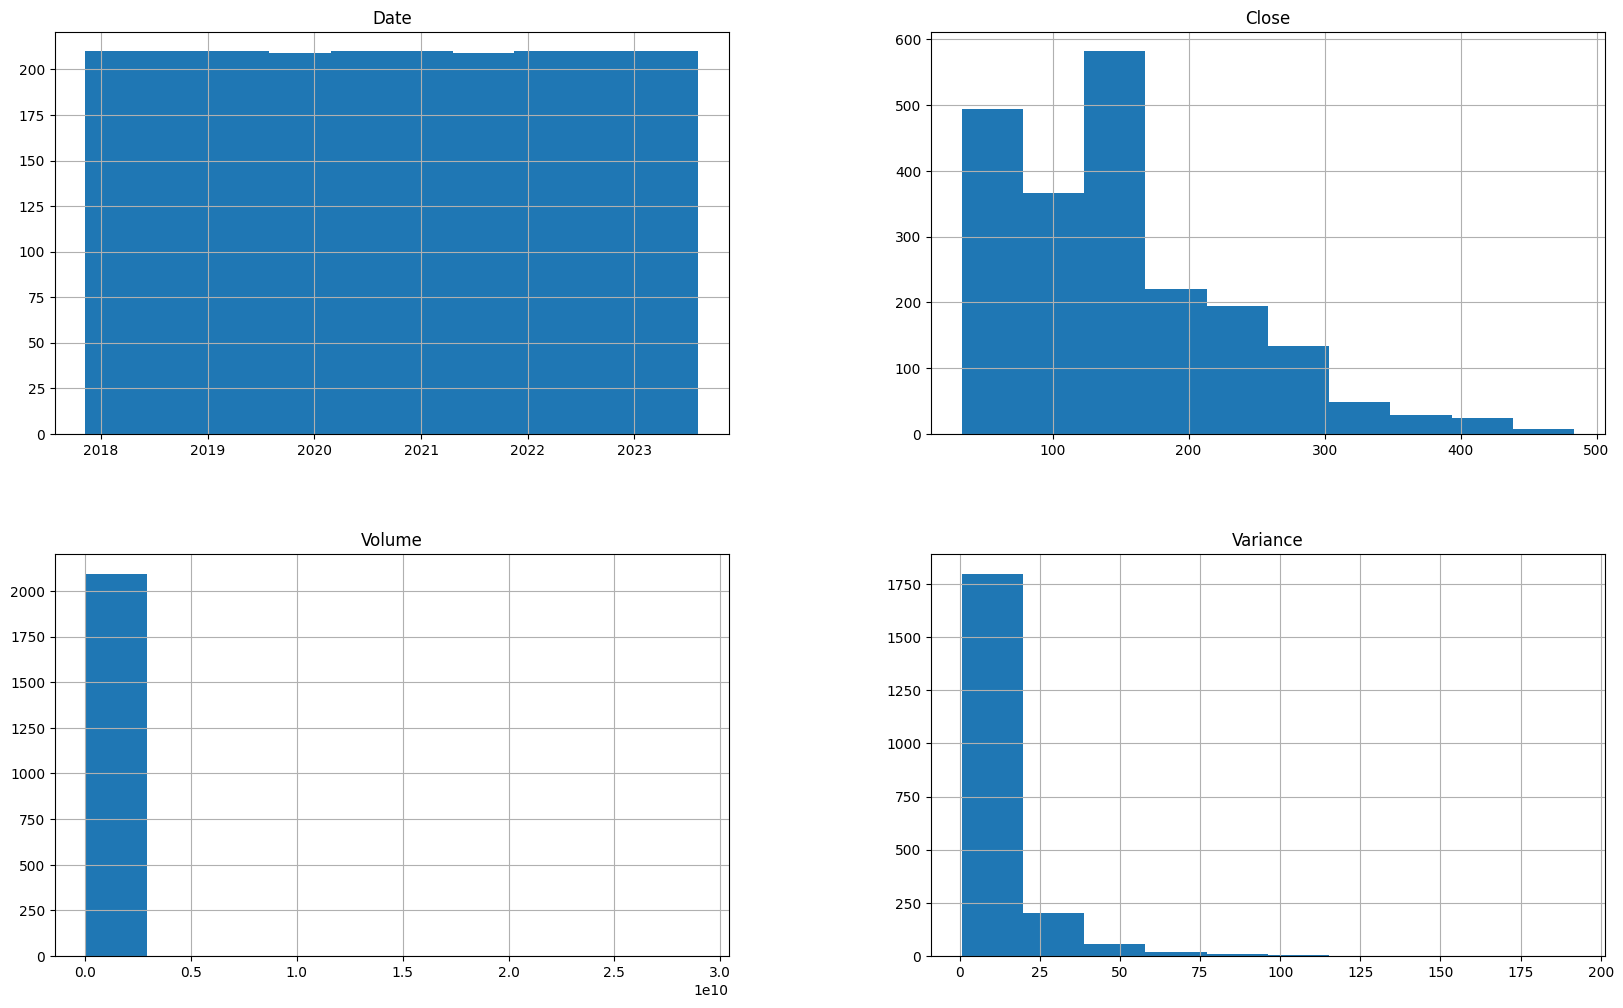

In [54]:
X_train.hist(figsize=[20, 12])
plt.show()

In [55]:
X_train.describe()

,Close,Volume,Variance
count,2098.000000,2.098000e+03,2098.000000
mean,150.118261,2.490891e+08,11.451761
std,82.800364,1.014184e+09,14.403339
min,33.010323,1.016030e+07,0.610867
25%,81.971788,6.545999e+07,3.545638
50%,143.457558,1.045898e+08,7.036434
75%,196.357681,1.930206e+08,13.446255
max,483.583618,2.895912e+10,191.717880


### Normalizing


##### method 1 : Standard Scaler


In [56]:
# def normalization(df: pd.DataFrame, method):

In [57]:
X_train_normalized_ss = X_train.copy()
X_validation_normalized_ss = X_validation.copy()

scaler_ss = StandardScaler()
cols = X_train.drop(columns=["Date"]).columns
X_train_normalized_ss[cols] = scaler_ss.fit_transform(X_train_normalized_ss[cols])
X_validation_normalized_ss[cols] = scaler_ss.transform(X_validation_normalized_ss[cols])

In [58]:
X_train_normalized_ss.describe()

,Close,Volume,Variance
count,2.098000e+03,2098.000000,2.098000e+03
mean,-2.709410e-17,0.000000,4.741467e-17
std,1.000238e+00,1.000238,1.000238e+00
min,-1.414678e+00,-0.235643,-7.528448e-01
25%,-8.232176e-01,-0.181104,-5.490399e-01
50%,-8.046210e-02,-0.142512,-3.066219e-01
75%,5.585778e-01,-0.055297,1.385074e-01
max,4.028302e+00,28.315257,1.251856e+01


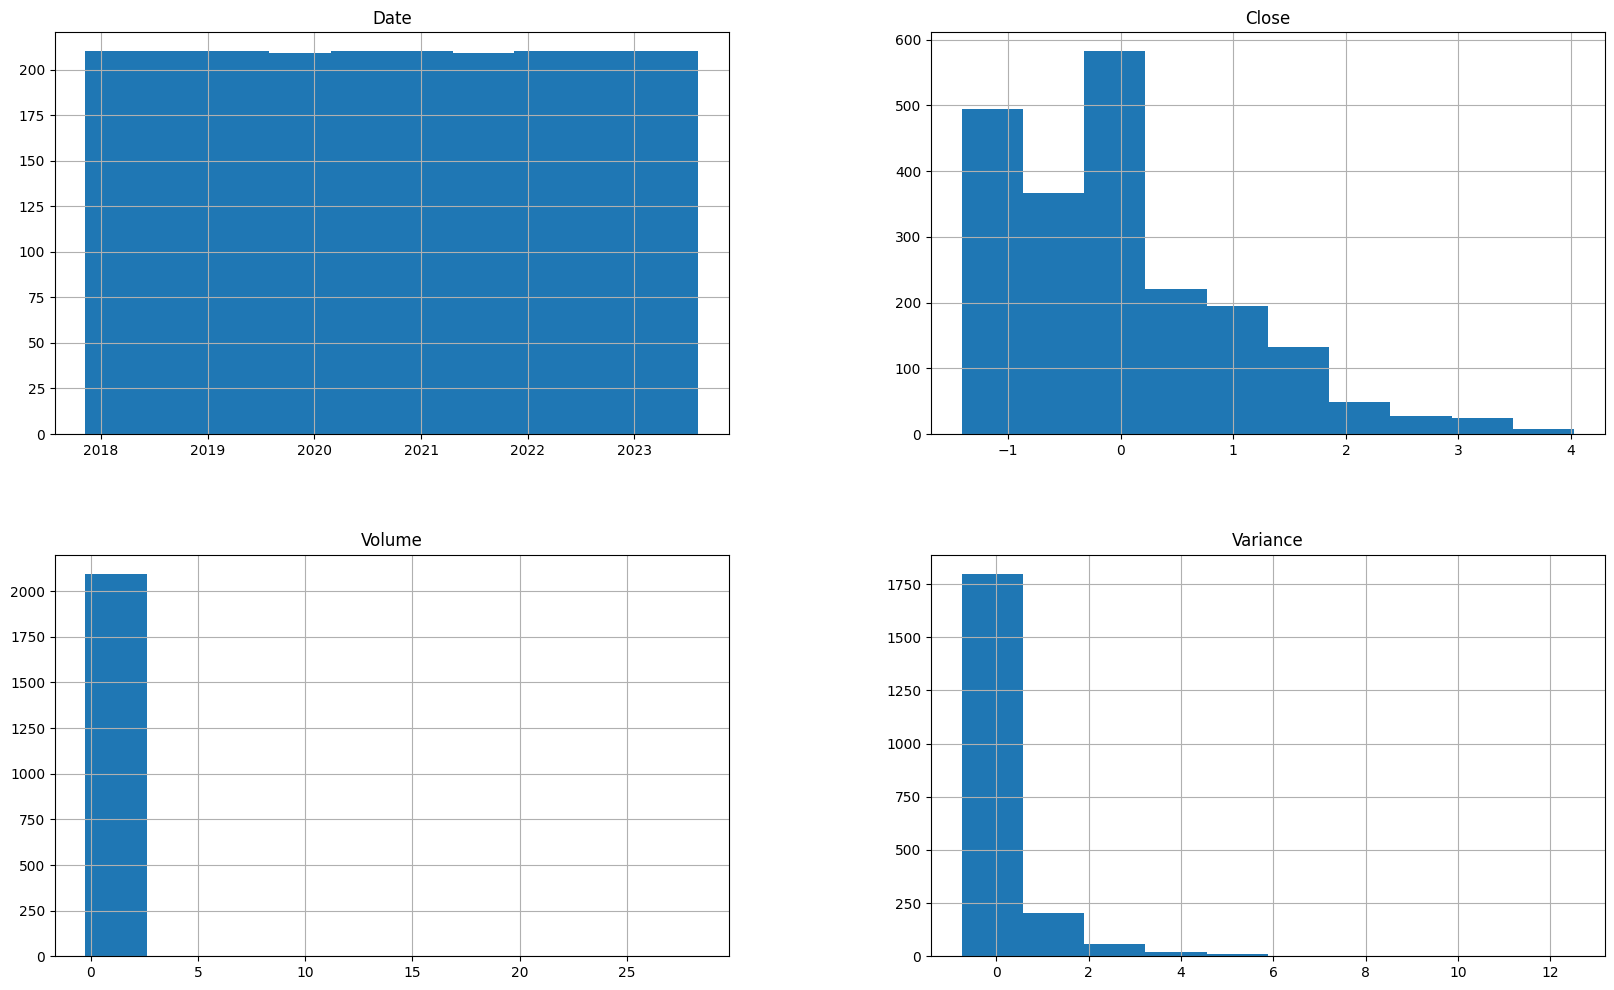

In [59]:
X_train_normalized_ss.hist(figsize=[20, 12])
plt.show()

##### method 2 : Power Transform


In [60]:
X_train_transformed = X_train.copy()
X_validation_transformed = X_validation.copy()

power_transformer = PowerTransformer(method="yeo-johnson", standardize=True)

cols = X_train.drop(columns=["Date"]).columns

X_train_transformed[cols] = power_transformer.fit_transform(X_train_transformed[cols])
X_validation_transformed[cols] = power_transformer.transform(
    X_validation_transformed[cols]
)

In [61]:
X_train_transformed.describe()

,Close,Volume,Variance
count,2.098000e+03,2.098000e+03,2.098000e+03
mean,1.083764e-16,-9.320370e-15,-4.335056e-16
std,1.000238e+00,1.000238e+00,1.000238e+00
min,-2.221810e+00,-2.869403e+00,-2.519427e+00
25%,-8.107004e-01,-5.249464e-01,-7.655246e-01
50%,1.538186e-01,-3.696628e-02,1.995747e-02
75%,7.283273e-01,5.484932e-01,7.189766e-01
max,2.520115e+00,3.686680e+00,2.824635e+00


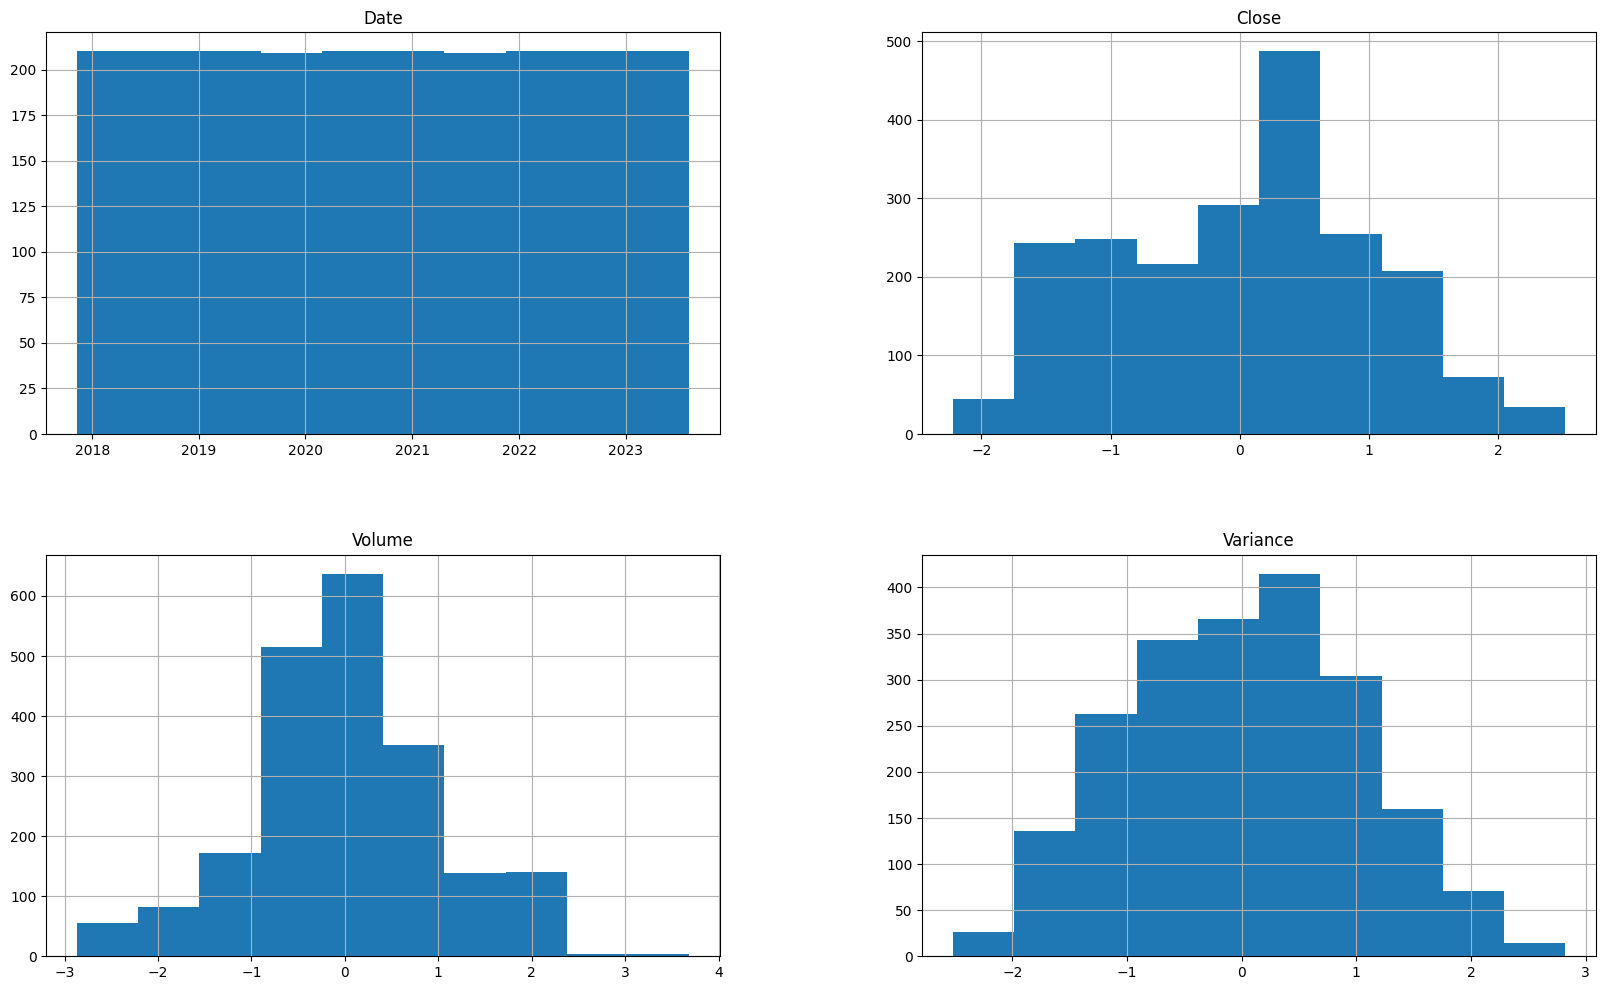

In [62]:
X_train_transformed.hist(figsize=[20, 12])
plt.show()

##### method 3 : Min Max Scaler


In [63]:
X_train_normalized_ms = X_train.copy()
X_validation_normalized_ms = X_validation.copy()

scaler_min_max = StandardScaler()
cols = X_train.drop(columns=["Date"]).columns
X_train_normalized_ms[cols] = scaler_min_max.fit_transform(X_train_normalized_ms[cols])
X_validation_normalized_ms[cols] = scaler_min_max.transform(
    X_validation_normalized_ms[cols]
)

In [64]:
X_train_normalized_ms.describe()

,Close,Volume,Variance
count,2.098000e+03,2098.000000,2.098000e+03
mean,-2.709410e-17,0.000000,4.741467e-17
std,1.000238e+00,1.000238,1.000238e+00
min,-1.414678e+00,-0.235643,-7.528448e-01
25%,-8.232176e-01,-0.181104,-5.490399e-01
50%,-8.046210e-02,-0.142512,-3.066219e-01
75%,5.585778e-01,-0.055297,1.385074e-01
max,4.028302e+00,28.315257,1.251856e+01


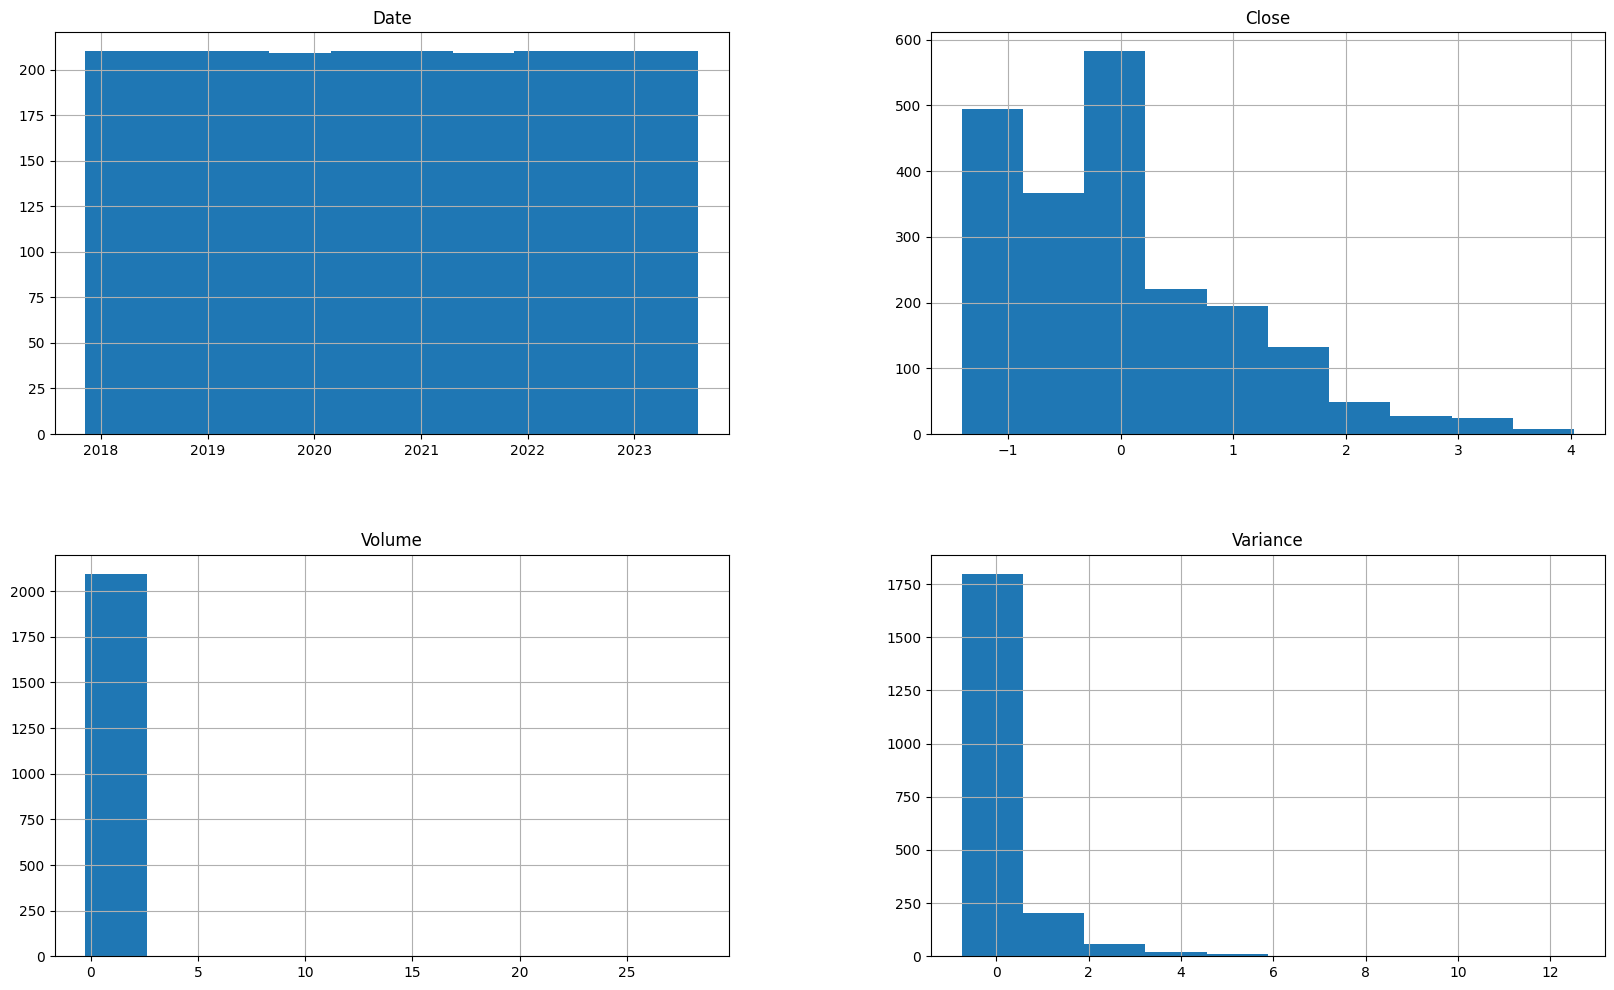

In [65]:
X_train_normalized_ms.hist(figsize=[20, 12])
plt.show()

In [66]:
df_train_val.corr()

<ipython-input-66-ee934eb016f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_val.corr()


,Close,Volume,Label,Variance
Close,1.000000,0.049219,-0.015416,0.671699
Volume,0.049219,1.000000,0.012916,0.083045
Label,-0.015416,0.012916,1.000000,-0.008214
Variance,0.671699,0.083045,-0.008214,1.000000


# Modeling and Evaluating


### Normalizing


##### Power Transform


In [67]:
df_train_val_transformed = df_train_val.copy()

power_transformer = PowerTransformer(method="yeo-johnson", standardize=True)

cols = df_train_val_transformed.drop(columns=["Date", "Label"]).columns

df_train_val_transformed[cols] = power_transformer.fit_transform(
    df_train_val_transformed[cols]
)

##### Standard Scaler


In [68]:
df_train_val_nomalized_ss = df_train_val.copy()

ss = StandardScaler()

cols = df_train_val_nomalized_ss.drop(columns=["Date", "Label"]).columns

df_train_val_nomalized_ss[cols] = ss.fit_transform(df_train_val_nomalized_ss[cols])

##### Min Max


In [69]:
df_train_val_nomalized_ms = df_train_val.copy()

ms = MinMaxScaler()

cols = df_train_val_nomalized_ms.drop(columns=["Date", "Label"]).columns

df_train_val_nomalized_ms[cols] = ss.fit_transform(df_train_val_nomalized_ms[cols])

##### Choose Best Normalizing Method


In [70]:
df_train_val_nomalized = df_train_val_nomalized_ss

In [71]:
def evaluation(y_true, y_pred, df_evaluation, model_name):
    # Evaluate
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred)

    new_record = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc_score,
    }

    df_evaluation.loc[model_name] = new_record

    # Confusion matrix
    print(confusion_matrix(y_true, y_pred))
    return df_evaluation

In [113]:
test_item[1:].values.reshape(-1,1))

array([[158.8878631591797],
       [85841743],
       [2.3021392822265625]], dtype=object)

In [125]:
X_train

,Date,Close,Volume,Variance
0,2017-11-09,120.779999,86864600,11.185997
1,2017-11-10,105.585999,84614000,19.907997
2,2017-11-11,119.615997,107708000,23.228004
3,2017-11-12,123.856003,144948000,23.057007
4,2017-11-13,123.402000,116200000,15.606003
...,...,...,...,...
2093,2023-08-03,160.358566,85629319,1.804794
2094,2023-08-04,158.409103,99473749,4.357224
2095,2023-08-05,159.509796,86465174,3.292679
2096,2023-08-06,159.627823,72981325,1.677734


In [126]:
def model_predict(
    df_train_val,
    model,
    test_item,
    # confusion_df,
    y_true,
    start_date_train="2017-11-09",
    start_date_val="2023-08-08",
    end_date_val="2023-09-07",
):
    from datetime import date, timedelta

    test_item_date = test_item.Date.date()

    end_date_train = (test_item_date - timedelta(days=1)).strftime("%Y-%m-%d")

    X_train, y_train = train_test_split_by_date(
        df_train_val,
        start_date_train,
        end_date_train,
        start_date_val,
        end_date_val,
        divide_X_y=True,
        test=False,
    )
    X_train = X_train.drop('Date', axis=1)


    # Train model
    model.fit(X_train.values, y_train)

    # Predict
    y_pred = model.predict(test_item[1:].values.reshape(1,-1))

    return y_pred

    # if y_true == 1 and y_pred == 1:
    #     confusion_df["tp"] = confusion_df["tp"] + 1
    # if y_true == 0 and y_pred == 0:
    #     confusion_df["tn"] = confusion_df["tn"] + 1
    # if y_true == 0 and y_pred == 1:
    #     confusion_df["fp"] = confusion_df["fp"] + 1
    # if y_true == 1 and y_pred == 0:
    #     confusion_df["fn"] = confusion_df["fn"] + 1

    # return confusion_df

In [127]:
df_confusion = pd.DataFrame({}, columns=["tp", "tn", "fp", "fn"])
df_evaluation = pd.DataFrame(
    columns=["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]
)

### Logistic Regression


In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from datetime import date, timedelta
from sklearn.model_selection import train_test_split

# model 1
model_lr = LogisticRegression(penalty="l2", C=0.0001)
model_name = "Logistic Regression"

df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
}

model_new = model_lr
y_pred_list = []
for i in range(len(X_validation)):
    test_item = X_validation.iloc[i]

    test_item_date = test_item.Date.date()

    y_true = y_validation.iloc[i]

    model = model_new

    y_val_pred = model_predict(df_train_val, model, test_item, y_true)
    y_pred_list.append(y_val_pred)

df_evaluation = evaluation(
    y_validation.tolist(), y_pred_list, df_evaluation, model_name
)

[[ 0 13]
 [ 0 18]]


In [75]:
df_train_val.corr()

<ipython-input-75-ee934eb016f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_val.corr()


,Close,Volume,Label,Variance
Close,1.000000,0.049219,-0.015416,0.671699
Volume,0.049219,1.000000,0.012916,0.083045
Label,-0.015416,0.012916,1.000000,-0.008214
Variance,0.671699,0.083045,-0.008214,1.000000


### Decision Tree


In [137]:
# model 2
model_dt = DecisionTreeClassifier(random_state=42)
model_name = "Decision Tree"

df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
}

model_new = model_dt
y_pred_list = []
for i in range(len(X_validation)):
    test_item = X_validation.iloc[i]

    test_item_date = test_item.Date.date()

    y_true = y_validation.iloc[i]

    model = model_new

    y_val_pred = model_predict(df_train_val, model, test_item, y_true)
    y_pred_list.append(y_val_pred)

df_evaluation = evaluation(
    y_validation.tolist(), y_pred_list, df_evaluation, model_name
)

[[ 5  8]
 [ 7 11]]


In [77]:
! pip install xgboost

In [78]:
df_train_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2129 non-null   datetime64[ns]
 1   Close     2129 non-null   float64       
 2   Volume    2129 non-null   int64         
 3   Label     2129 non-null   int64         
 4   Variance  2129 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 83.3 KB


In [81]:
# ! pip install xgboost

In [88]:
df_train_val.values

array([[Timestamp('2017-11-09 00:00:00'), 120.77999877929688, 86864600,
        0, 11.185997009277344],
       [Timestamp('2017-11-10 00:00:00'), 105.58599853515625, 84614000,
        1, 19.907997131347656],
       [Timestamp('2017-11-11 00:00:00'), 119.61599731445312, 107708000,
        1, 23.228004455566406],
       ...,
       [Timestamp('2023-09-05 00:00:00'), 137.7813720703125, 54468002, 1,
        3.6259002685546875],
       [Timestamp('2023-09-06 00:00:00'), 142.1132354736328, 67734044, 1,
        5.0094451904296875],
       [Timestamp('2023-09-07 00:00:00'), 143.25074768066406, 62422431,
        1, 2.107025146484375]], dtype=object)

In [135]:
import xgboost as xgb

# model 3
model_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model_name = "XGB Boost"

df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
}

model_new = model_xgb
y_pred_list = []
for i in range(len(X_validation)):
    test_item = X_validation.iloc[i]

    test_item_date = test_item.Date.date()

    y_true = y_validation.iloc[i]

    model = model_new


    y_val_pred = model_predict(df_train_val, model, test_item, y_true)
    y_pred_list.append(y_val_pred)

df_evaluation = evaluation(
    y_validation.tolist(), y_pred_list, df_evaluation, model_name
)

[[ 4  9]
 [ 8 10]]


In [136]:
df_evaluation

,Accuracy,Precision,Recall,F1 Score,AUC
Logistic Regression,0.580645,0.580645,1.000000,0.734694,0.500000
Decision Tree,0.516129,0.578947,0.611111,0.594595,0.497863
XGB Boost,0.451613,0.526316,0.555556,0.540541,0.431624
